In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
df.shape

(125973, 45)

<Axes: xlabel='duration'>

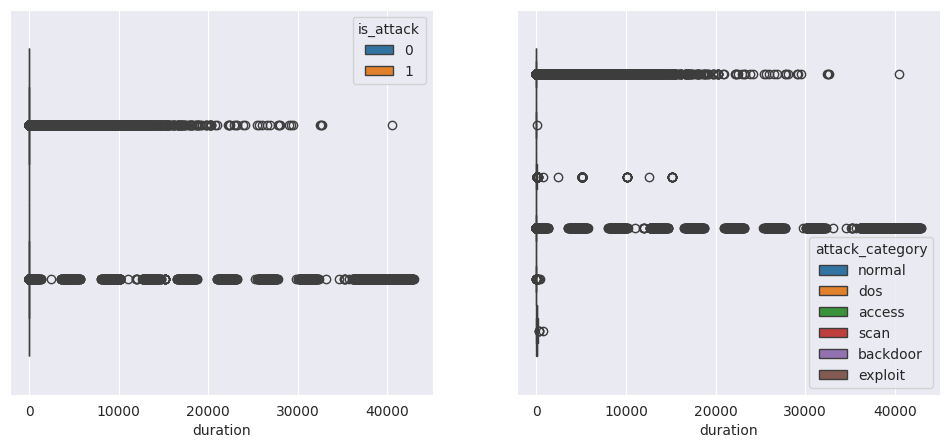

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='duration',hue='is_attack')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='duration',hue='attack_category')

In [13]:
basic = df.loc[:,'duration':'urgent'].copy()
basic = pd.merge(basic,df[['is_attack','attack_category']],left_index=True,right_index=True)
basic_num = basic.select_dtypes(include=['int64','float64'])
basic_num.head()

,duration,srcbytes,dstbytes,is_attack
0,0,491,0,0
1,0,146,0,0
2,0,0,0,1
3,0,232,8153,0
4,0,199,420,0


In [16]:
nums = df.select_dtypes(include=['int64','float64'])
nums = pd.merge(nums,df[['attack_category']],left_index=True,right_index=True)
nums.head()

,duration,srcbytes,dstbytes,hot,numfailedlogins,numcompromised,numroot,numfilecreations,numaccessfiles,numoutboundcmds,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,is_attack,attack_category
0,0,491,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,normal
1,0,146,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,normal
2,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,dos
3,0,232,8153,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,normal
4,0,199,420,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,normal


In [17]:
nums.shape[1]

32

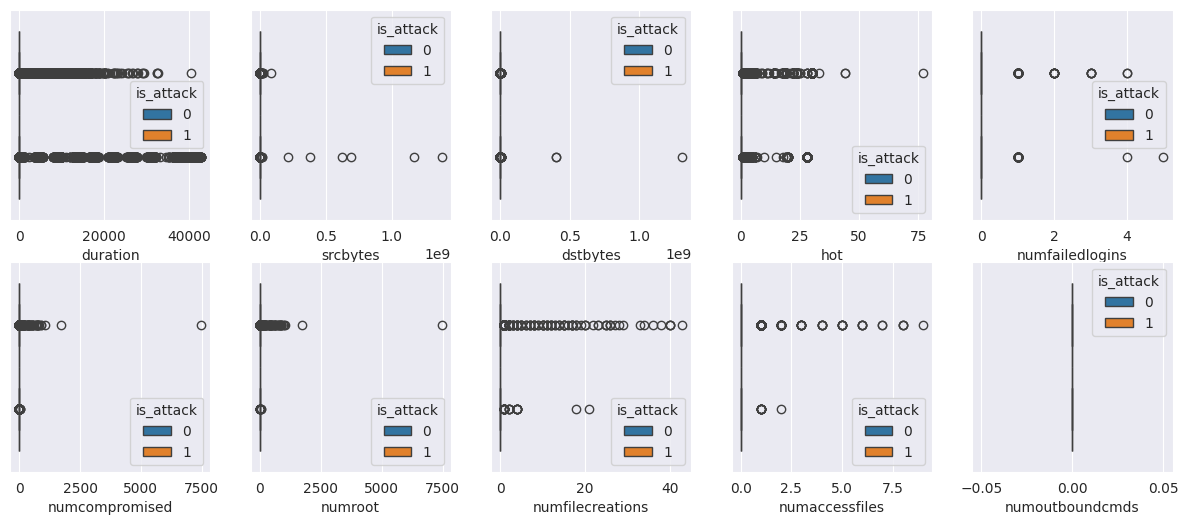

In [23]:
plt.figure(figsize=(15,6))
pcount = 1
for col in nums.loc[:,'duration':'numoutboundcmds'].columns:
  if col != 'is_attack' and col != 'attack_category':
    plt.subplot(2,5,pcount)
    sns.boxplot(data=nums,x=col,hue='is_attack')
    pcount += 1

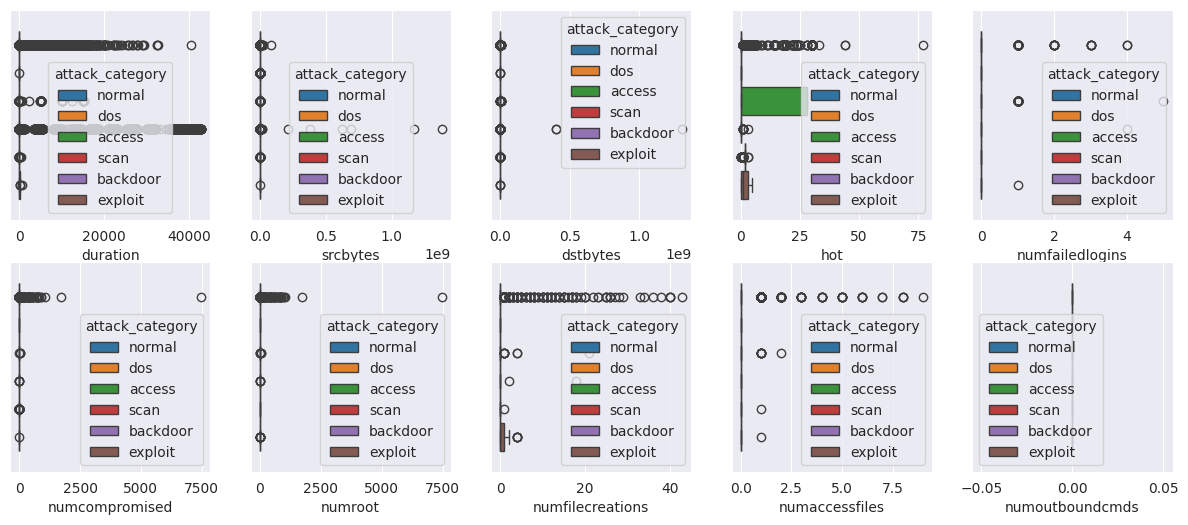

In [24]:
plt.figure(figsize=(15,6))
pcount = 1
for col in nums.loc[:,'duration':'numoutboundcmds'].columns:
  if col != 'is_attack' and col != 'attack_category':
    plt.subplot(2,5,pcount)
    sns.boxplot(data=nums,x=col,hue='attack_category')
    pcount += 1

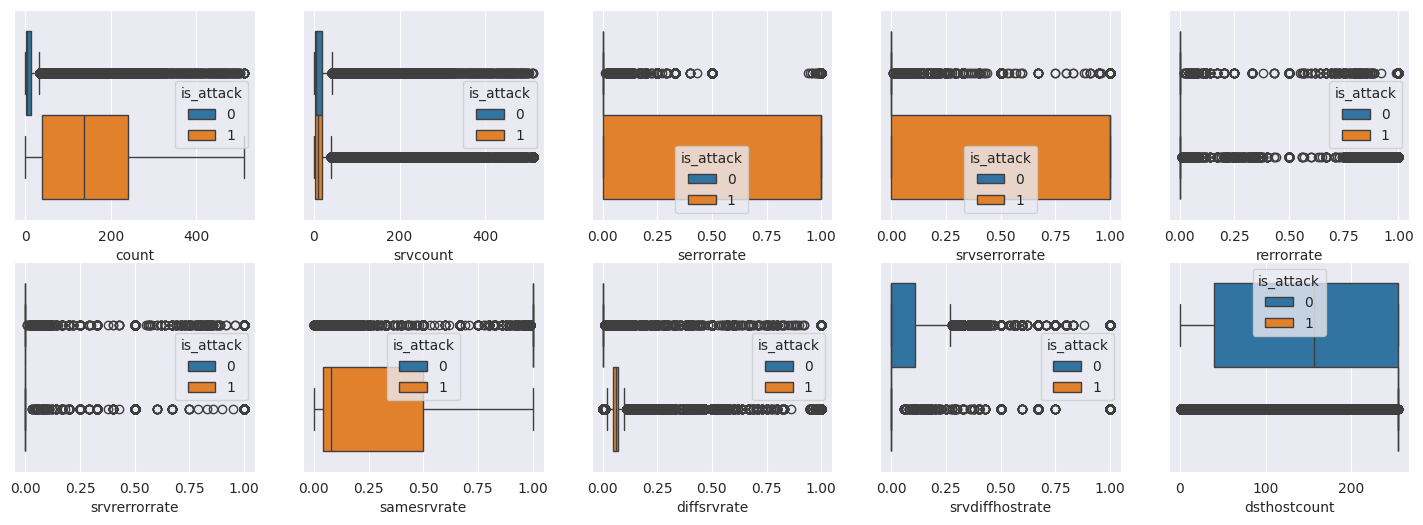

In [27]:
plt.figure(figsize=(18,6))
pcount = 1
for col in nums.loc[:,'count':'dsthostcount'].columns:
  if col != 'is_attack' and col != 'attack_category':
    plt.subplot(2,5,pcount)
    sns.boxplot(data=nums,x=col,hue='is_attack')
    pcount += 1

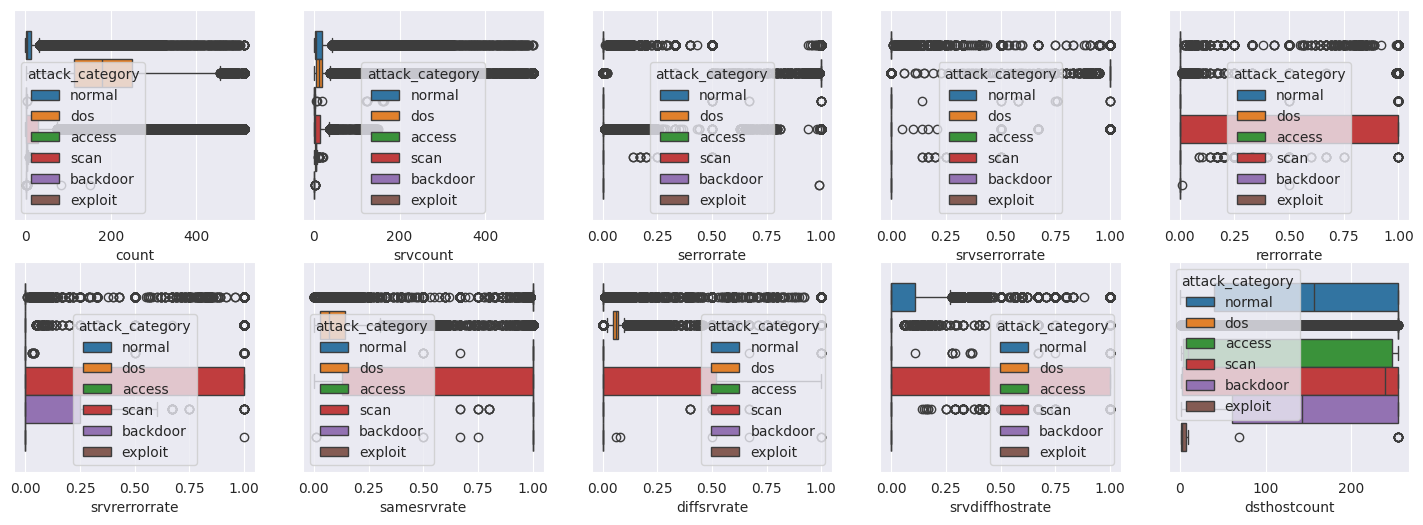

In [28]:
plt.figure(figsize=(18,6))
pcount = 1
for col in nums.loc[:,'count':'dsthostcount'].columns:
  if col != 'is_attack' and col != 'attack_category':
    plt.subplot(2,5,pcount)
    sns.boxplot(data=nums,x=col,hue='attack_category')
    pcount += 1

In [35]:
nums.loc[:,'dsthostcount':].shape

(125973, 13)

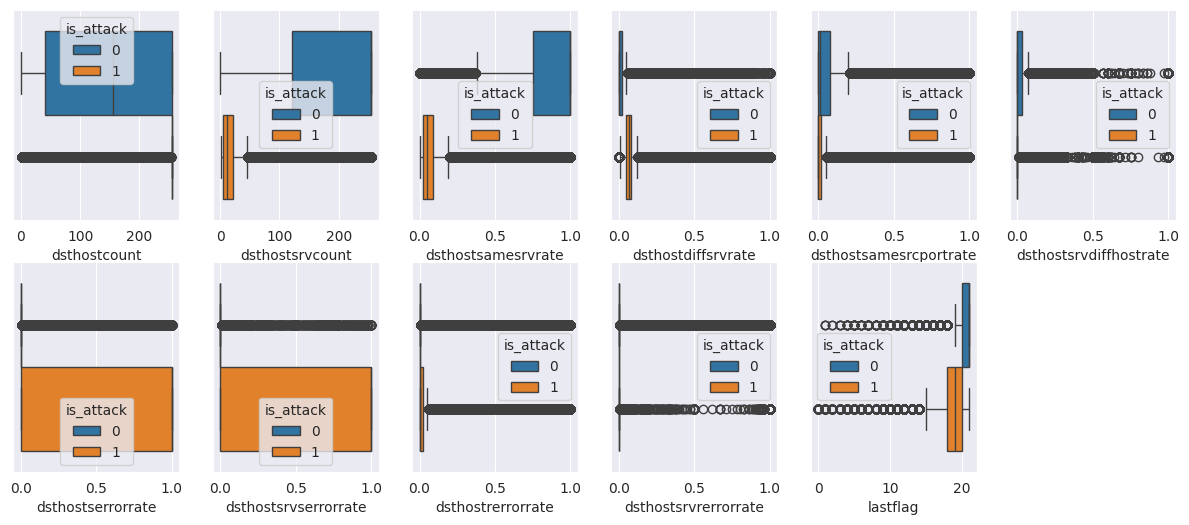

In [37]:
plt.figure(figsize=(15,6))
pcount = 1
for col in nums.loc[:,'dsthostcount':].columns:
  if col != 'is_attack' and col != 'attack_category':
    plt.subplot(2,6,pcount)
    sns.boxplot(data=nums,x=col,hue='is_attack')
    pcount += 1

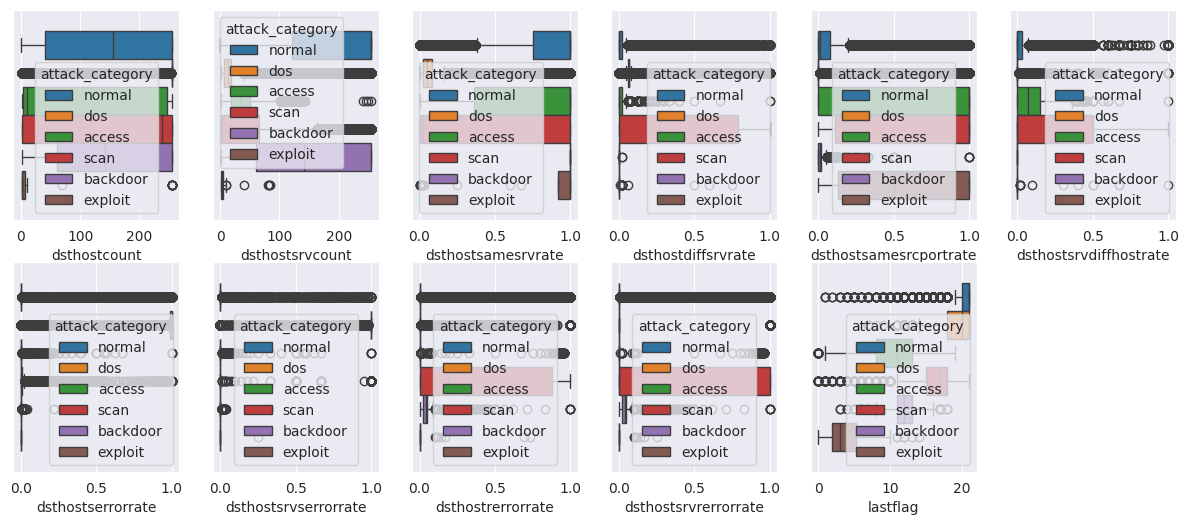

In [38]:
plt.figure(figsize=(15,6))
pcount = 1
for col in nums.loc[:,'dsthostcount':].columns:
  if col != 'is_attack' and col != 'attack_category':
    plt.subplot(2,6,pcount)
    sns.boxplot(data=nums,x=col,hue='attack_category')
    pcount += 1

In [47]:
cats = df.select_dtypes(include=['object','category'])
cats = pd.merge(cats,df[['is_attack']],left_index=True,right_index=True)
cats.head()

,protocoltype,service,flag,land,wrongfragment,urgent,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin,attack,attack_category,is_attack
0,tcp,ftp_data,SF,0,0,0,0,0,0,0,0,0,normal,normal,0
1,udp,other,SF,0,0,0,0,0,0,0,0,0,normal,normal,0
2,tcp,private,S0,0,0,0,0,0,0,0,0,0,neptune,dos,1
3,tcp,http,SF,0,0,0,1,0,0,0,0,0,normal,normal,0
4,tcp,http,SF,0,0,0,1,0,0,0,0,0,normal,normal,0


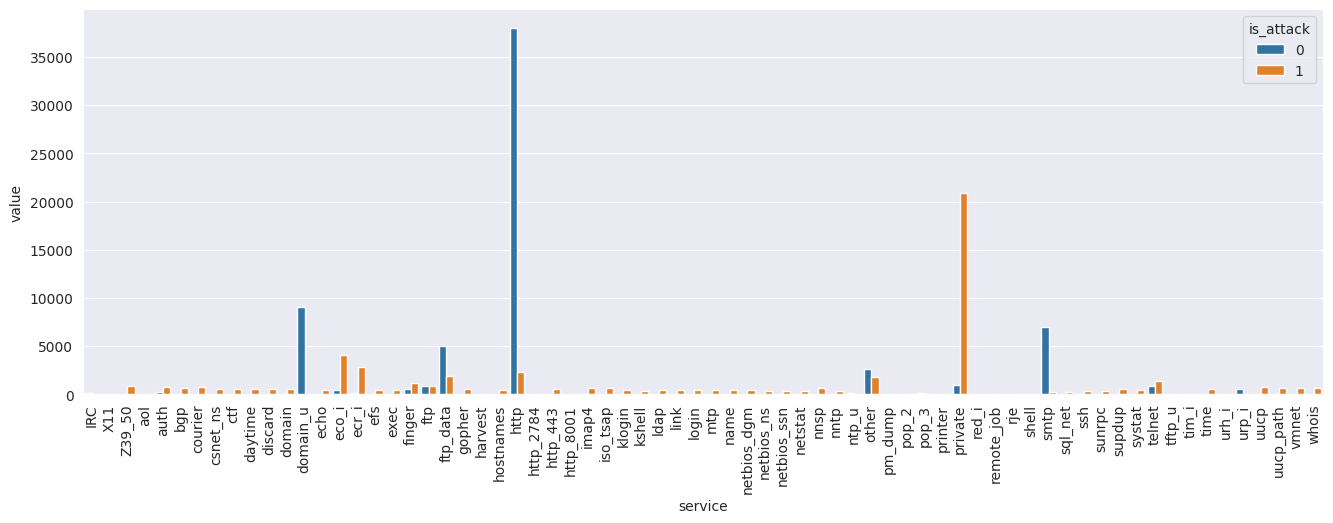

In [89]:
pvt = pd.pivot_table(data=cats,index='service',columns='is_attack',values='attack',aggfunc='count').reset_index()
pvt_melt = pd.melt(pvt,id_vars=['service'],value_vars=[0,1])
plt.figure(figsize=(16,5))
sns.barplot(data=pvt_melt,x='service',y='value',hue='is_attack')
plt.xticks(rotation=90)
plt.show()

<ipython-input-85-e1980285c560>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns='is_attack',values='attack',aggfunc='count').reset_index()
<ipython-input-85-e1980285c560>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns='is_attack',values='attack',aggfunc='count').reset_index()
<ipython-input-85-e1980285c560>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns=

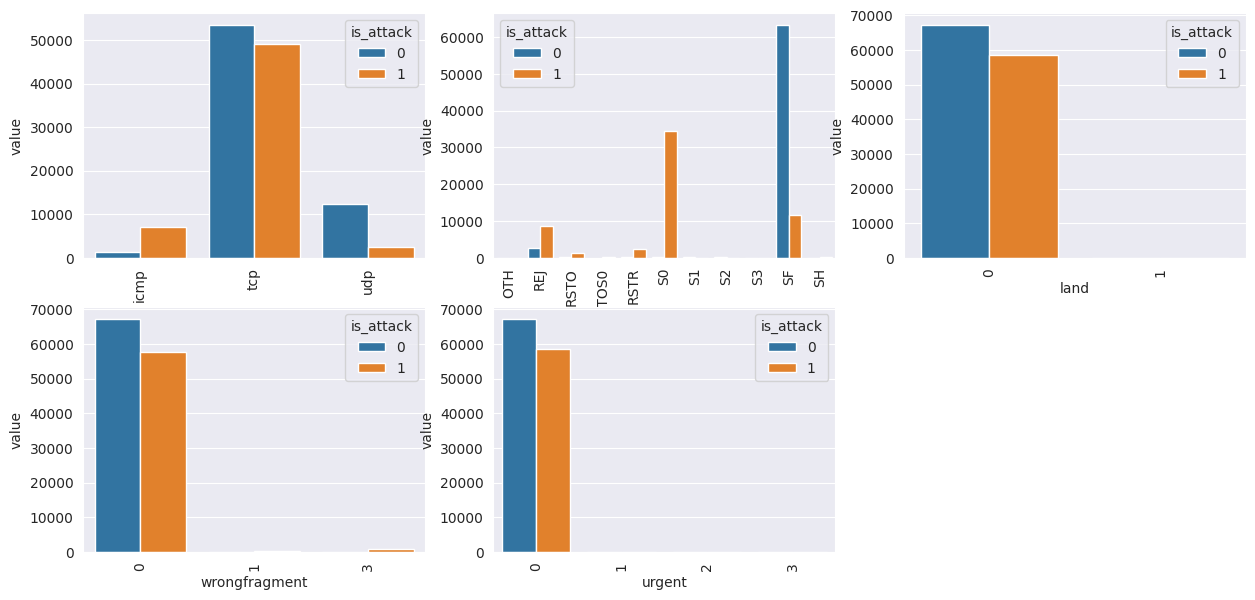

In [85]:
plt.figure(figsize=(15,7))
pcount = 1
for col in cats.loc[:,'protocoltype':'urgent'].columns:
  if col != 'is_attack' and col != 'attack_category' and col != 'service':
    plt.subplot(2,3,pcount)
    pvt = pd.pivot_table(data=cats,index=col,columns='is_attack',values='attack',aggfunc='count').reset_index()
    pvt_melt = pd.melt(pvt,id_vars=col,value_vars=[0,1])
    sns.barplot(data=pvt_melt,x=col,y='value',hue='is_attack')
    plt.xticks(rotation=90)
    pcount += 1

<ipython-input-90-ae376941f28f>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns='is_attack',values='attack',aggfunc='count').reset_index()
<ipython-input-90-ae376941f28f>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns='is_attack',values='attack',aggfunc='count').reset_index()
<ipython-input-90-ae376941f28f>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns=

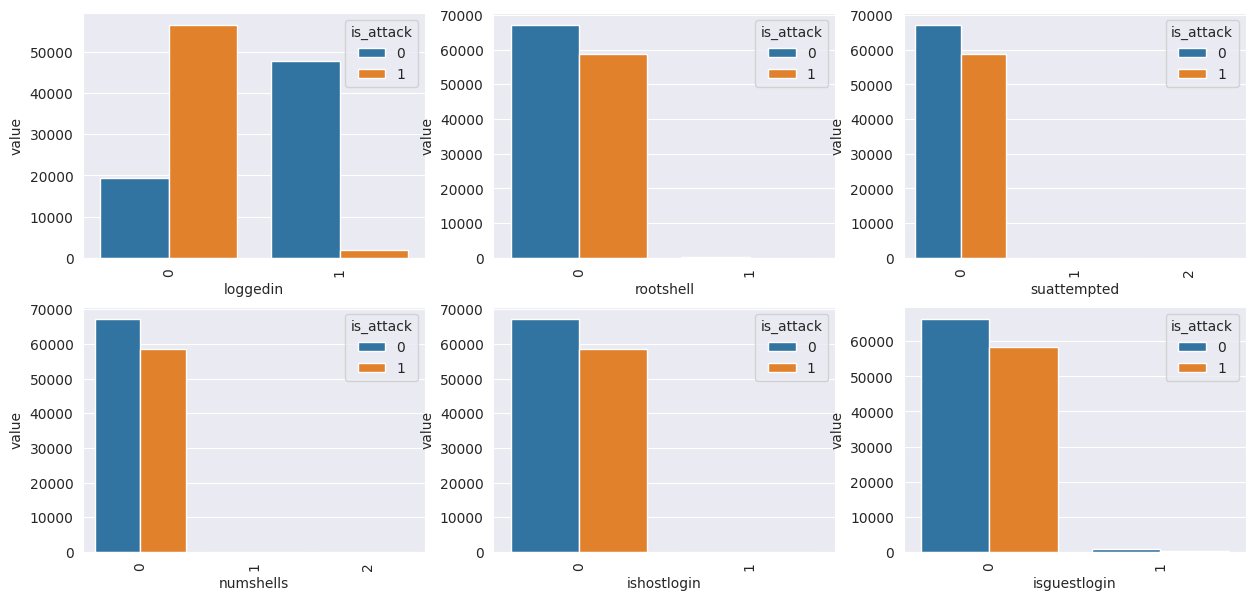

In [90]:
plt.figure(figsize=(15,7))
pcount = 1
for col in cats.loc[:,'loggedin':'isguestlogin'].columns:
  if col != 'is_attack' and col != 'attack_category' and col != 'service':
    plt.subplot(2,3,pcount)
    pvt = pd.pivot_table(data=cats,index=col,columns='is_attack',values='attack',aggfunc='count').reset_index()
    pvt_melt = pd.melt(pvt,id_vars=col,value_vars=[0,1])
    sns.barplot(data=pvt_melt,x=col,y='value',hue='is_attack')
    plt.xticks(rotation=90)
    pcount += 1

In [94]:
pd.pivot_table(data=cats,index='protocoltype',columns='attack_category',values='attack',aggfunc='count').reset_index()

attack_category,protocoltype,access,backdoor,dos,exploit,normal,scan
0,icmp,NaN,NaN,2847.0,NaN,1309.0,4135.0
1,tcp,993.0,958.0,41232.0,49.0,53600.0,5857.0
2,udp,NaN,NaN,892.0,3.0,12434.0,1664.0


In [96]:
pvt = pd.pivot_table(data=cats,index='protocoltype',columns='attack_category',values='attack',aggfunc='count').reset_index()
pvt_melt = pd.melt(pvt,id_vars='protocoltype',value_vars=['access','backdoor','dos','exploit','normal','scan'])
pvt_melt.head()

,protocoltype,attack_category,value
0,icmp,access,NaN
1,tcp,access,993.0
2,udp,access,NaN
3,icmp,backdoor,NaN
4,tcp,backdoor,958.0


<ipython-input-97-4800b06bcdc9>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns='attack_category',values='attack',aggfunc='count').reset_index()
<ipython-input-97-4800b06bcdc9>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=col,columns='attack_category',values='attack',aggfunc='count').reset_index()
<ipython-input-97-4800b06bcdc9>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(data=cats,index=

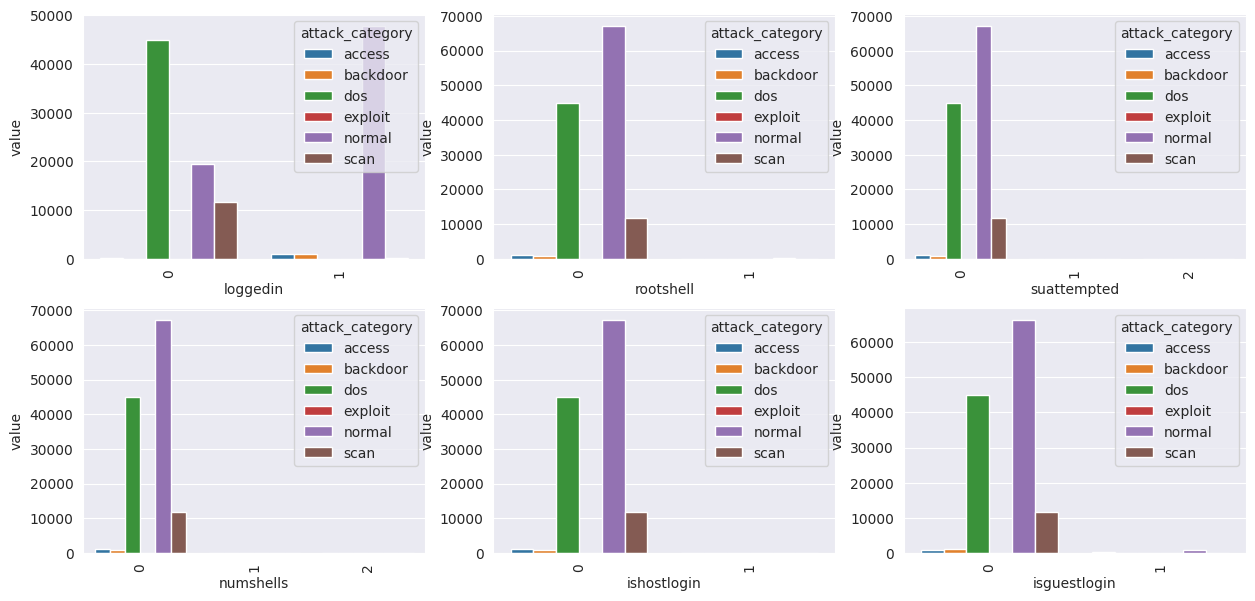

In [97]:
plt.figure(figsize=(15,7))
pcount = 1
for col in cats.loc[:,'loggedin':'isguestlogin'].columns:
  if col != 'is_attack' and col != 'attack_category' and col != 'service':
    plt.subplot(2,3,pcount)
    pvt = pd.pivot_table(data=cats,index=col,columns='attack_category',values='attack',aggfunc='count').reset_index()
    pvt_melt = pd.melt(pvt,id_vars=col,value_vars=['access','backdoor','dos','exploit','normal','scan'])
    sns.barplot(data=pvt_melt,x=col,y='value',hue='attack_category')
    plt.xticks(rotation=90)
    pcount += 1

<Axes: >

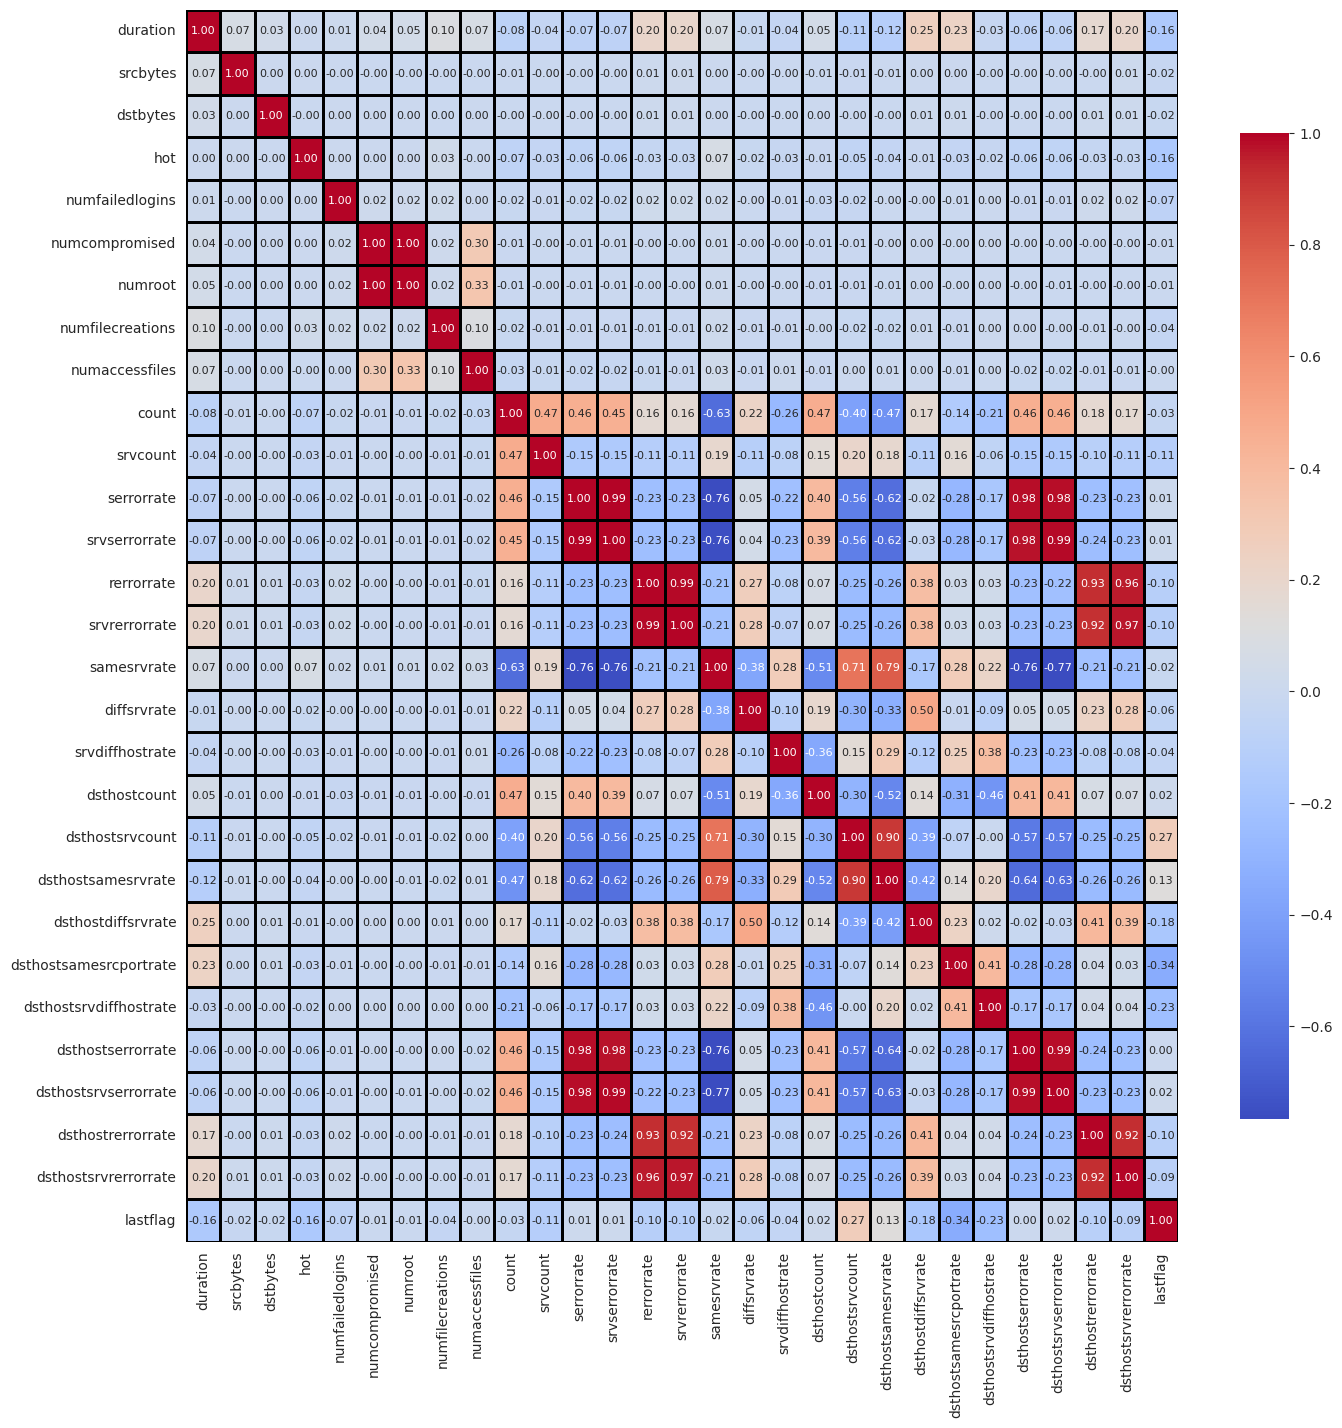

In [109]:
corr_nums = nums.drop(['is_attack','attack_category','numoutboundcmds'],axis=1)
corrs = corr_nums.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corrs,annot=True,cmap='coolwarm', fmt='.2f',
            linewidths=1, linecolor='black',  # black lines between cells
            annot_kws={'size': 8},           # decrease font size
            cbar_kws={'shrink': 0.8})

<Axes: >

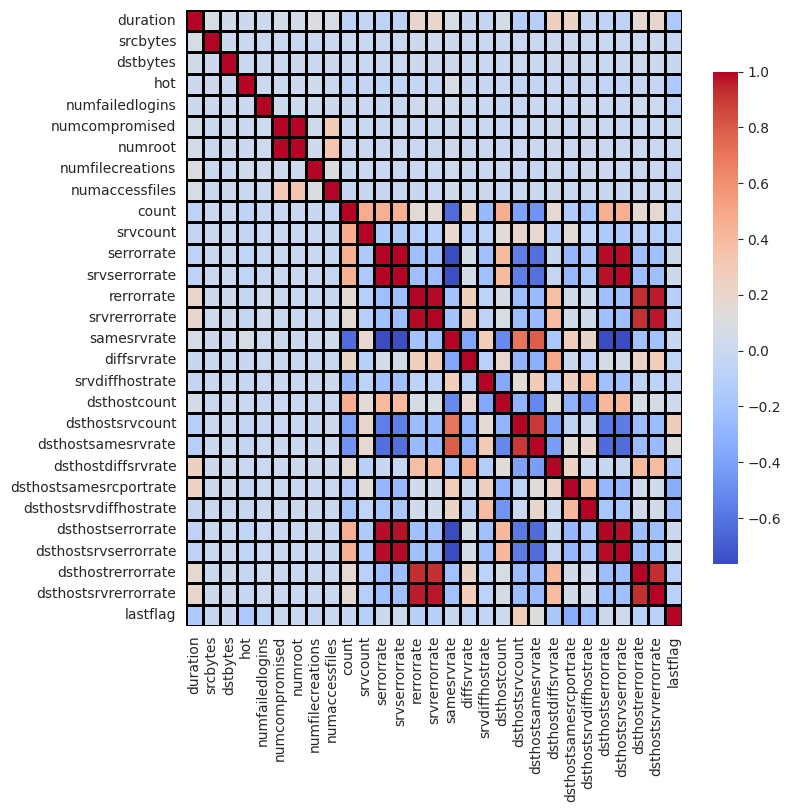

In [111]:
plt.figure(figsize=(8,8))
sns.heatmap(corrs,cmap='coolwarm', fmt='.2f',
            linewidths=1, linecolor='black',  # black lines between cells
            annot_kws={'size': 8},           # decrease font size
            cbar_kws={'shrink': 0.8})

In [147]:
for idx in corrs.index:
  row = pd.DataFrame(corrs.loc[idx])
  row.columns = ['col']
  effect = row[np.logical_and(row['col'] > 0.7, row['col'] != 1)].index.to_list()
  if effect:
    print(idx)
    print(effect)
    print(row[np.logical_and(row['col'] > 0.7, row['col'] != 1)].values.flatten())
    print('--------------------------------')

  effect2 = row[np.logical_and(row['col'] < -0.7, row['col'] != 1)].index.to_list()
  if effect2:
    print(idx)
    print(effect2)
    print(row[np.logical_and(row['col'] < -0.7, row['col'] != 1)].values.flatten())
    print('--------------------------------')



numcompromised
['numroot']
[0.99883345]
--------------------------------
numroot
['numcompromised']
[0.99883345]
--------------------------------
serrorrate
['srvserrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate']
[0.99328924 0.97937308 0.98113896]
--------------------------------
serrorrate
['samesrvrate']
[-0.76188751]
--------------------------------
srvserrorrate
['serrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate']
[0.99328924 0.97759601 0.98625172]
--------------------------------
srvserrorrate
['samesrvrate']
[-0.75678403]
--------------------------------
rerrorrate
['srvrerrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate']
[0.98900765 0.9267485  0.96444867]
--------------------------------
srvrerrorrate
['rerrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate']
[0.98900765 0.91782234 0.970208  ]
--------------------------------
samesrvrate
['dsthostsrvcount', 'dsthostsamesrvrate']
[0.70540979 0.78897796]
--------------------------------
samesrvrate
['serrorrate

<Axes: xlabel='numroot', ylabel='numcompromised'>

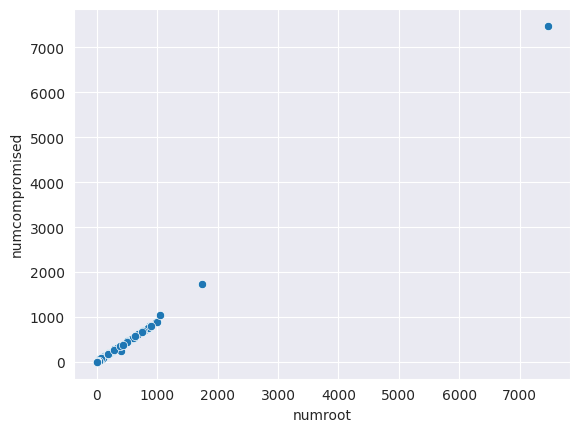

In [139]:
sns.scatterplot(data=df,x='numroot',y='numcompromised')

<Axes: xlabel='serrorrate', ylabel='samesrvrate'>

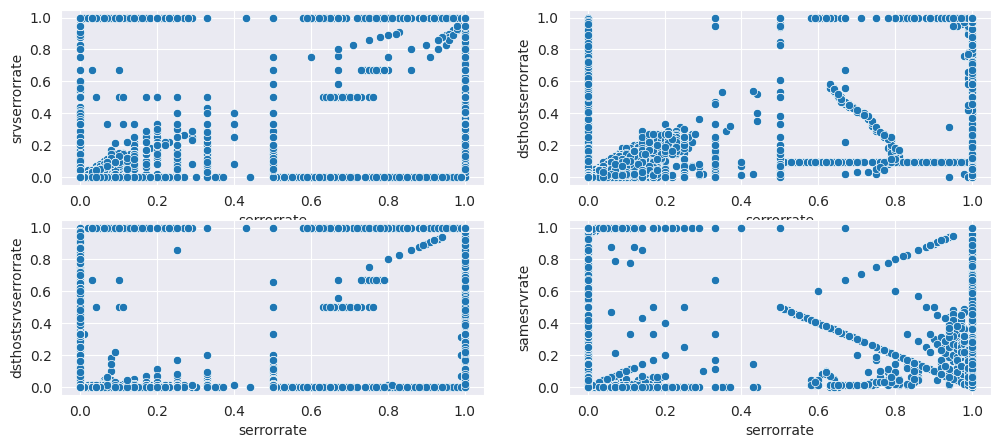

In [141]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.scatterplot(data=df,x='serrorrate',y='srvserrorrate')
plt.subplot(2,2,2)
sns.scatterplot(data=df,x='serrorrate',y='dsthostserrorrate')
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='serrorrate',y='dsthostsrvserrorrate')
plt.subplot(2,2,4)
sns.scatterplot(data=df,x='serrorrate',y='samesrvrate')

<Axes: xlabel='srvserrorrate', ylabel='samesrvrate'>

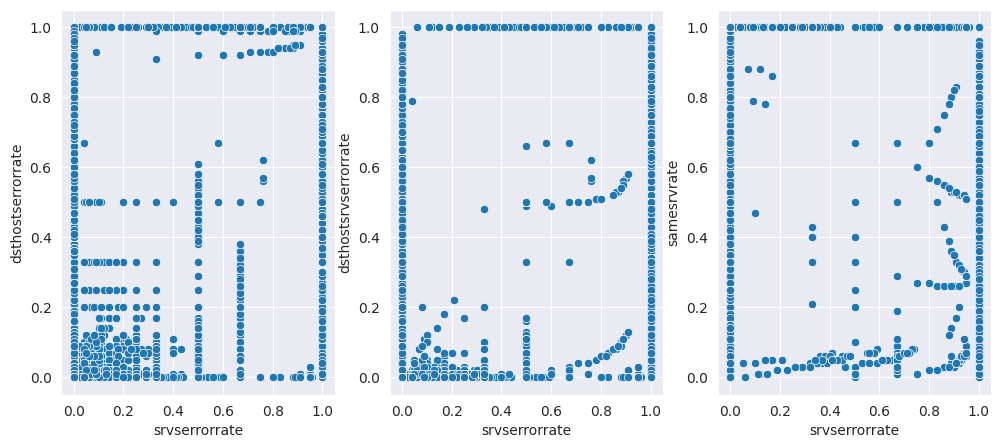

In [142]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='srvserrorrate',y='dsthostserrorrate')
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='srvserrorrate',y='dsthostsrvserrorrate')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='srvserrorrate',y='samesrvrate')

<Axes: xlabel='rerrorrate', ylabel='dsthostsrvrerrorrate'>

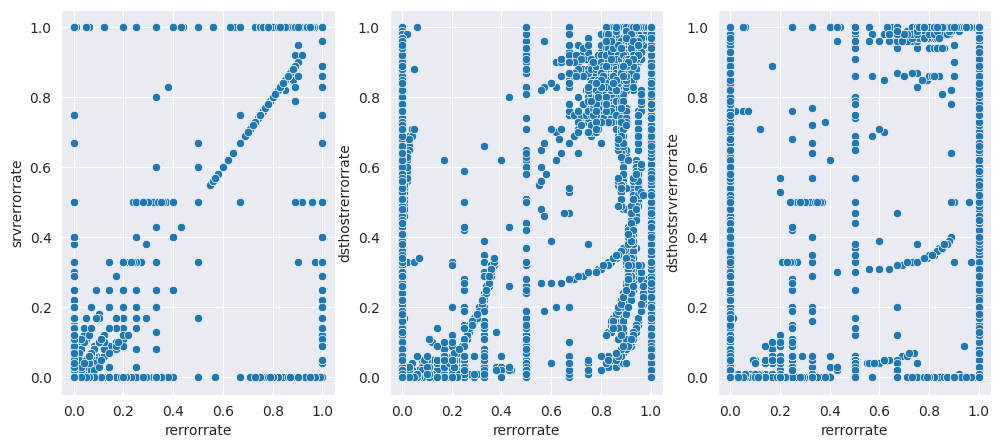

In [143]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='rerrorrate',y='srvrerrorrate')
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='rerrorrate',y='dsthostrerrorrate')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='rerrorrate',y='dsthostsrvrerrorrate')

<Axes: xlabel='srvrerrorrate', ylabel='dsthostsrvrerrorrate'>

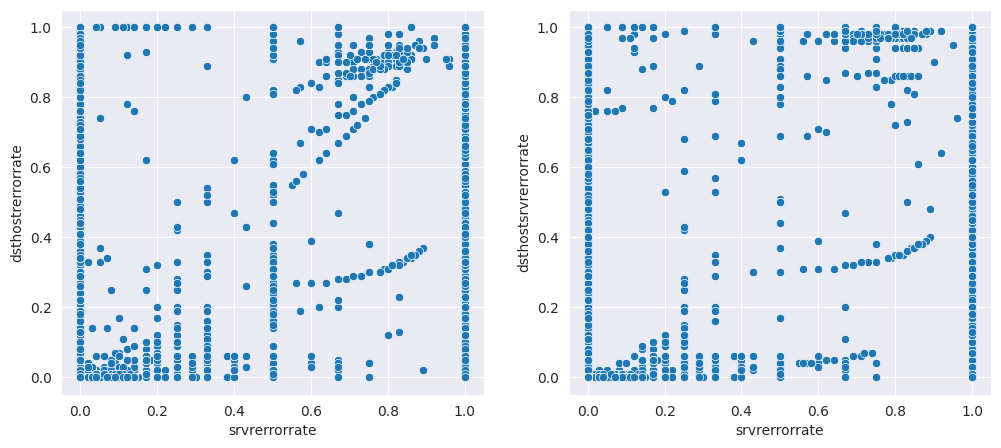

In [144]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='srvrerrorrate',y='dsthostrerrorrate')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='srvrerrorrate',y='dsthostsrvrerrorrate')